# <center> Экзамен по "Науке о данных" </center>

Время выполнения заданий - 3 часа (11:00 - 14:00). 

Экзамен включает 3 обязательных задания для получения максимальной оценки (100 баллов) и 30 бонусных баллов.

До 14:00 необходимо сдать задание на Github Classroom в формате .ipynb, указав имя, фамилию и группу в названии файла, и загрузить свой код по каждой задаче на Яндекс.Контест https://contest.yandex.ru/contest/18973/enter для проверки на плагитат. 

Уточнения условия, если они будут, появятся по ссылке https://www.overleaf.com/read/kbwtcskdtbbv, в телеграм канале @room112, и в чате «Науки о данных».


In [1]:
# импорт модулей
import matplotlib.pyplot as plt
import numpy as np

### Задача про блуждание (35 баллов)

Шерлок Холмс расследует дело о пропаже бюллетеней на избирательном участке. Ватсон заметил, что всегда во время своих размышлений Холмс ходит ровно по прямой. Предположим, что в начале движения Шерлок находится в точке с координатой $0$. В каждый момент времени его координата изменяется на $\Delta x$ метров, где $\Delta x$ — случайная величина, имеющая стандартное нормальное распределение. Эта величина прибавляется к текущей координате после каждого шага и может принимать положительные и отрицательные значения.

1. Постройте график изменения положения Шерлока (его координаты на прямой) за $1000$ шагов. По горизонтали – количество пройденных шагов, по вертикали – положение Шерлока.[**5 баллов**]

2. Постройте для траектории положения Шерлока из предыдущего пункта график изменения выборочного среднего и дисперсии для $\Delta x$. По горизонтали – количество шагов, по вертикали – значения выборочного среднего и выборочной дисперсии. [**10 баллов**]

3. Проведите $10^3$ экспериментов по 500 шагов. Продемонстрируйте на одном графике $15$ случайных траекторий из проведенных экспериментов. [**10 баллов**]

4. Добавьте на график из предыдущего пункта усредненную по всем экспериментам траекторию выборочной дисперсии для каждого шага. [**10 баллов**]

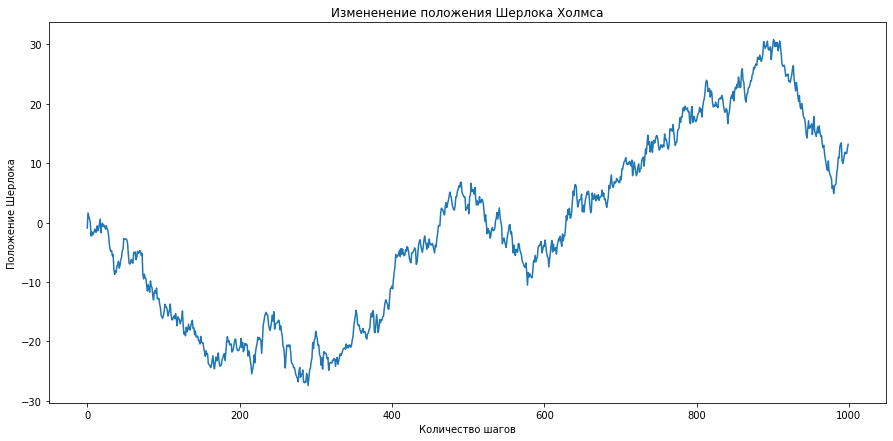

In [5]:
# пункт 1
sherlok = np.array([])
x = 0

for i in range(1000):
    x += np.random.normal(0.0, 1.0)
    sherlok = np.append(sherlok, x)

plt.figure(figsize = (15, 7))
plt.plot(np.arange(1000), sherlok)
plt.title('Измененение положения Шерлока Холмса')
plt.xlabel('Количество шагов')
plt.ylabel('Положение Шерлока')
plt.show()

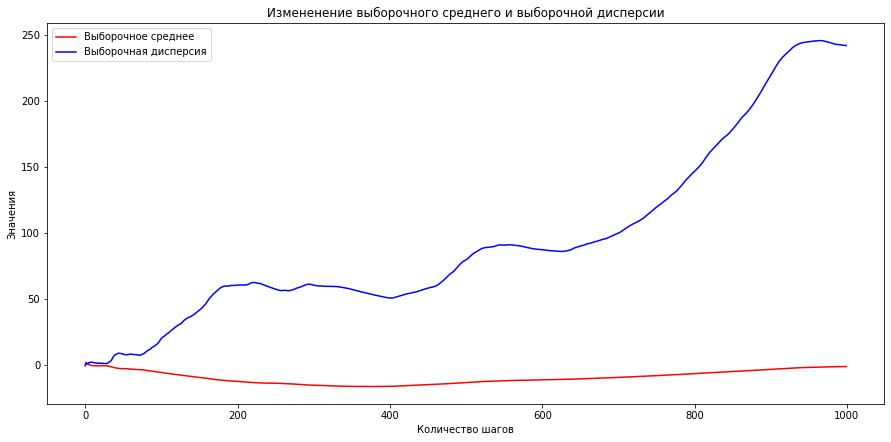

In [12]:
# пункт 2
mean = np.array([])
variance = np.array([])

for i in range(1, 1001):
    mean = np.append(mean, np.mean(sherlok[:i]))
    variance = np.append(variance, np.var(sherlok[:i]))

plt.figure(figsize = (15, 7))
plt.plot(np.arange(1000), mean, label = 'Выборочное среднее', color = 'red')
plt.plot(np.arange(1000), variance, label = 'Выборочная дисперсия', color = 'b')
plt.title('Измененение выборочного среднего и выборочной дисперсии')
plt.xlabel('Количество шагов')
plt.ylabel('Значения')
plt.legend()
plt.show()

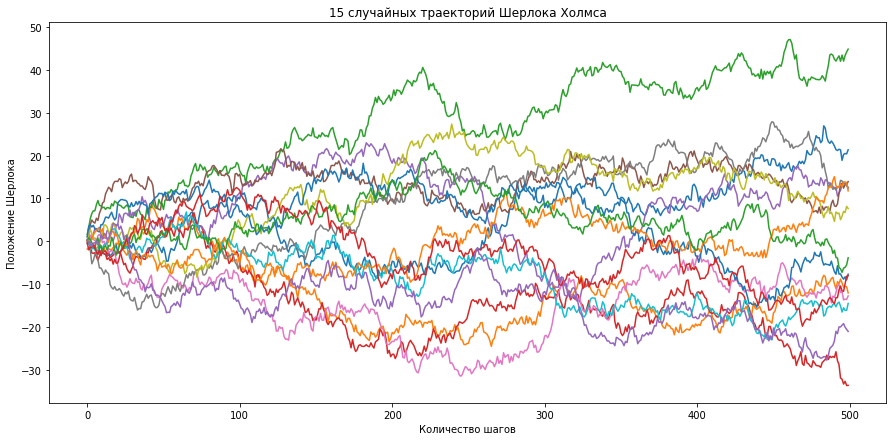

In [21]:
# пункт 3
all_sherlok = []
for j in range(1000):
    sherlok = np.array([])
    x = 0
    
    for i in range(500):
        x += np.random.normal(0.0, 1.0)
        sherlok = np.append(sherlok, x)
        
    all_sherlok.append(sherlok)

plt.figure(figsize = (15, 7))

for i in range(15):
    plt.plot(np.arange(500), all_sherlok[np.random.randint(0, len(all_sherlok))])
    
plt.title('15 случайных траекторий Шерлока Холмса')
plt.xlabel('Количество шагов')
plt.ylabel('Положение Шерлока')
plt.show()

### Парковки от мэра (40 баллов + 15 бонусных баллов)

Перед выборами в центре города открыли неразмеченную парковку длиной $100$ метров. Каждый приезжающий водитель случайным образом выбирает место длиной $2$ метра, и если место оказалось свободным, встает на парковку до конца дня. Если он не помещается в выбранный отрезок, то водитель в нервном состоянии уезжает с парковки. За один день на парковку пытается встать $1000$ проезжающих мимо водителей. Для выполнения всех пунктов заданий проведите $2000$ симуляций. 

*Hint: Для простоты будем считать, что выбор точки на парковке - это центр машины.*

1. В среднем сколько машин оказываются припаркованы к концу дня? [**20 баллов**]

2. Постройте $95$\%-ый доверительный интервал для ожидаемого количества машин припаркованных к концу дня. [**10 баллов**]

3. Постройте $95$\%-ый доверительный интервал для ожидаемого количества свободного места на парковке к концу дня (в метрах). [**10 баллов**]

4. После возникшего хаоса на парковку добавили регулярную разметку для мест длиной $2$ метра, но водители разделились на два лагеря — тех, кто соблюдает и не соблюдает правила разметки. С вероятностью $p$ приезжает честный водитель и занимает случайное свободное место строго по разметке. Водители второго лагеря паркуются, как раньше. Нарисуйте график, где по оси ординат – процент честных водителей, а по оси абсцисс – процент свободного места на парковке к концу дню для вероятностей $p$ равным от $0$ до $1$ с шагом в $5$\%. Для каждого порога вероятности проведите по $500$ симуляций. [**15 бонусных баллов**]

### Правдоподобие счастья (25 баллов + 15 бонусных баллов)

Загрузите набор данных по измерению уровня счастья в разных странах мира за 2019 год (**data.csv** в репозитории экзамена). Полное описание датасета доступно по ссылке на Kaggle: https://www.kaggle.com/unsdsn/world-happiness?select=2019.csv

1. Постройте на графике гистограмму для уровня счастья (переменная Score) и ее функции плотности. Является ли распределение нормальным? [**5 баллов**]

2. Пусть уровень счастья – целевая вещественная переменная $y$, все $y_i$ независимы и нормальны $N(\mu, \sigma^2)$, где $\mu = a + b*x_i$. Выведите функцию правдоподобия и задачу для оптимизации поиска коэффициентов $a$, $b$ и $\sigma^2$. [**15 бонусных баллов**]

3. Оцените параметры с помощью метода максимального правдоподобия, если в роли $x_i$ выступает ВВП на душу населения (GDP per capita). [**10 баллов**]

4. Используя оценённые параметры и медианное значение ВВП на душу населения, оцените вероятность того, что уровень счастья будет больше 5.
[**10 баллов**]